# <font size='6' color='FF8C00' face='Courier New'>**Real Estate Listings Berlin (DE) April 2023**</font>
<hr style="margin-bottom: 40px;">


<font size='5' face='Courier New'>**План выполнения проекта**</font>

- 1. Загрузка данных и изучение общей информации

- 2. Предобработка данных
  
  - 2.1 Проверка дубликатов
  
  - 2.2 Проверка пропусков

  - 2.3 Изменение типов данных
    
  - 2.4 Анализ датафрейма на аномалии

- 3. Добавление дополнительных признаков

  - 3.1 Цена за квартиру в миллионах

  - 3.2 Тип энергии

  - 3.3 Система отопления в квартирах

- 4. Исследовательский анализ данных

  - 4.1 Анализ параметров объектов недвижимости
  
      - 4.1.1 Жилая площадь
      - 4.1.2 Количество комнат
      - 4.1.3 Параметр цен на квартиры
      - 4.1.4 Параметр тип энергии
      - 4.1.5 Параметр система отопления
      - 4.1.6 Параметры объектов. Итог
   
  - 4.2 Анализ факторов, влияющих на общую стоимость квартиры

      - 4.2.1 Жилая площадь
      - 4.2.2 Количество комнат
      - 4.2.3 Тип энергии в квартирах
      - 4.2.4 Система отопления в квартирах
      - 4.2.5 Год постройки домов
      - 4.2.6 Какие факторы влияют. Итог
    
- 5. Вывод на основании проведенного анализа


# <font size='6' face='Courier New'>**EDA**</font>

## 1.Загрузка данных и изучение общей информации

In [ ]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use ('dark_background')

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('real_estate_listings_clean.csv')

In [ ]:
# получим общую информацию о данных
def berlin_dataframe_info(df):
    try:
        display('Первые пять строк данных:')
        display(df.head(5))
        display('Описание данных:')
        display(df.describe())
        display('Общая информацию о датафрейме')
        display(df.info())
        display('Графическое отображение количества пропусков')
        display(pd.DataFrame(round(df.isna().mean() * 100, 1)).style.background_gradient('Greys'))
    except:
        return 'Проверьте параметры'

In [ ]:
berlin_dataframe_info(df)

'Первые пять строк данных:'

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000.0,64.00,3.0,3.57,13505.0,1971.0,2.0,3890.625000
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000.0,136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000.0,120.00,4.0,3.57,12161.0,1900.0,5.0,6416.666667
3,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349000.0,158.00,5.0,3.57,12103.0,1956.0,1.0,2208.860759
4,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990.0,126.00,4.0,3.57,12157.0,1909.0,3.0,3928.492063


'Описание данных:'

,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
count,4.942000e+03,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000
mean,5.654009e+05,85.067321,2.805544,5.891574,11954.461554,1944.344193,3.401255,6401.269284
std,6.107572e+05,58.315922,1.582906,121.004862,1628.058346,143.609751,29.137154,3183.956274
min,3.495000e+04,13.000000,1.000000,-3.500000,1099.000000,1.000000,1.000000,956.521739
25%,2.590000e+05,54.070000,2.000000,3.570000,10589.000000,1910.000000,1.000000,4537.537879
50%,3.899000e+05,72.740000,3.000000,3.570000,12161.000000,1956.000000,1.000000,5843.852267
75%,6.690000e+05,101.000000,3.000000,3.570000,13088.000000,1994.000000,3.000000,8063.468346
max,1.590000e+07,970.000000,26.000000,7996.000000,77933.000000,2026.000000,2023.000000,87739.070663


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                4942 non-null   object 
 1   energy             4942 non-null   object 
 2   heating            4942 non-null   object 
 3   price              4942 non-null   float64
 4   area               4942 non-null   float64
 5   rooms              4942 non-null   float64
 6   fee                4942 non-null   float64
 7   zipcode            4942 non-null   float64
 8   construction_year  4942 non-null   float64
 9   level              4942 non-null   float64
 10  price_per_area     4942 non-null   float64
dtypes: float64(8), object(3)
memory usage: 424.8+ KB


None

'Графическое отображение количества пропусков'

,0
url,0.000000
energy,0.000000
heating,0.000000
price,0.000000
area,0.000000
rooms,0.000000
fee,0.000000
zipcode,0.000000
construction_year,0.000000
level,0.000000


In [ ]:
# Определим количества уникальных значений для каждого столбца
dict_count = {}
for i in list(df.columns):
  dict_count[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict_count, index=['count']).transpose()

,count
url,4942
energy,20
heating,23
price,1430
area,2119
rooms,21
fee,68
zipcode,190
construction_year,155
level,20


## 2.Предобработка данных

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'fee'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'construction_year'}>],
       [<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'price_per_area'}>, <Axes: >]],
      dtype=object)

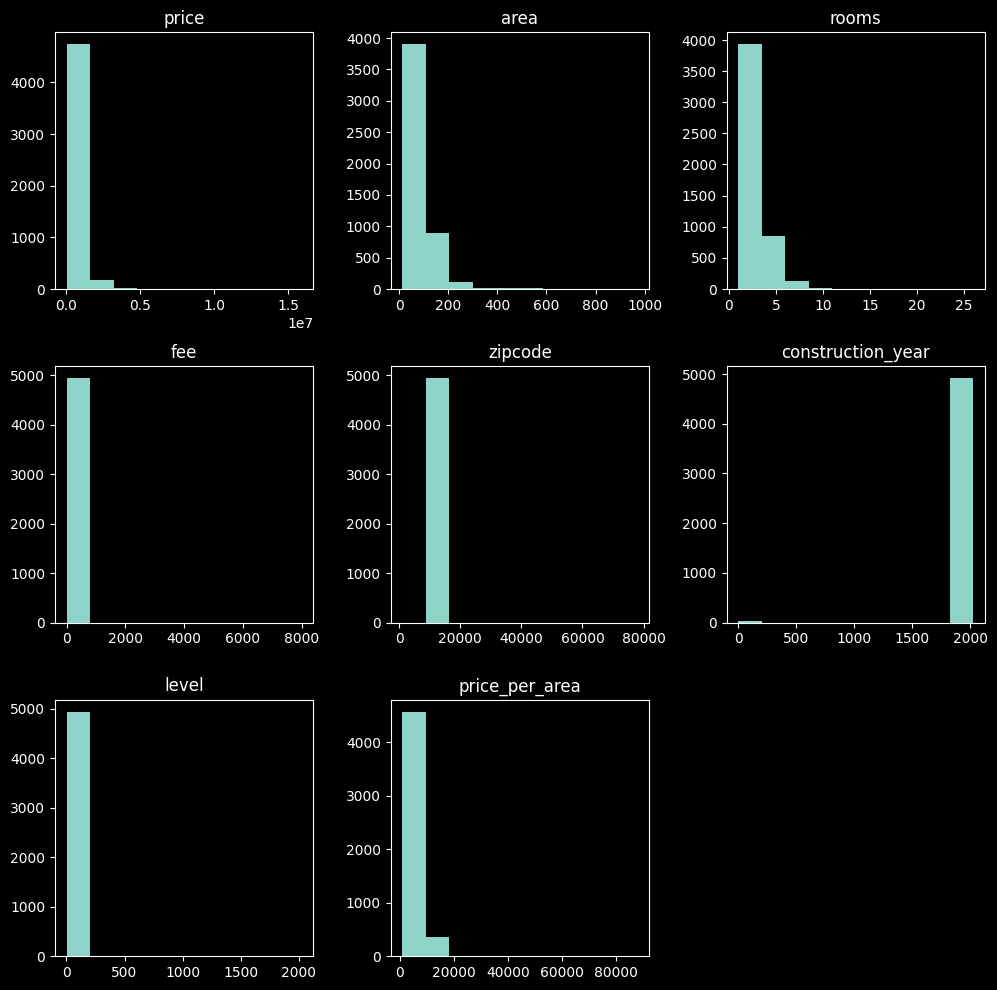

In [ ]:
df.hist(figsize=(12, 12), grid = False)

### 2.1 Проверка дубликатов

In [ ]:
# проверим на дубликаты
print(f'Количество дубликатов в наборе данных - {df.duplicated().sum()}')

Количество дубликатов в наборе данных - 0


Посмотрим на названия и количество строк в колонках `Тип энергии` и `Система отопления`

In [ ]:
df['energy'].value_counts()

na                           2112
Gas                          1414
Fernwärme                     829
Öl                            413
Luft-/                         34
Fernwärme,                     28
Elektro,                       24
Fußbodenheizung,               24
Elektro                        15
Solar                          12
Blockheizkraftwerk,            11
Gas,                           10
Erdwärme                        5
Pellets                         3
Flüssiggas                      2
Blockheizkraftwerk              2
Holz,                           1
Niedrigenergiehaus              1
Erdwärme,                       1
Fußbodenheizung, offener        1
Name: energy, dtype: int64

In [ ]:
df['heating'].value_counts()

na                           2112
Zentralheizung               1839
Etagenheizung                 366
Fußbodenheizung,              206
Fußbodenheizung               174
Heizungsart                    70
Kamin,                         34
Wärmepumpe                     30
Wasser-                        24
Kf                             17
Kamin                          15
Niedrigenergiehaus             12
Fußbodenheizung, offener       11
Etagenheizung, offener          8
Etagenheizung,                  6
Heizungsartoffener              4
Luft-/                          3
Wärmepumpe,                     3
Fertighaus                      3
Minergie zertifiziert           2
Ofen,                           1
Wärmepumpe, offener             1
Kohle,                          1
Name: heating, dtype: int64

Есть повторяющиеся названия и так же видно пропуски под названием `na` и их всех больше 2112!

_Исправление всех видов неточностей и разнообразий в этих столбцах, кажется задачей инженерной разработки.
Дайте мне знать, если вы хотите написать отдельную модель LSTM для решения этой проблемы:)_

Удалим дубликаты и ненужные символы.

In [ ]:
# убираем дубликаты в столбце energy и ненужные символы
df['energy'] = df['energy'].replace('Gas, ', 'Gas', regex=True).\
                            replace('Elektro, ', 'Elektro', regex=True).\
                            replace('Fernwärme, ', 'Fernwärme', regex=True).\
                            replace('Fußbodenheizung, ', 'Fußbodenheizung', regex=True).\
                            replace('Blockheizkraftwerk, ', 'Blockheizkraftwerk', regex=True).\
                            replace('Erdwärme, ', 'Erdwärme', regex=True).\
                            replace('Luft-/', 'Luft', regex=True).\
                            replace('Holz, ', 'Holz', regex=True)

In [ ]:
# убираем дубликаты в столбце energy и ненужные символы
df['heating'] = df['heating'].replace('Kamin, ', 'Kamin', regex=True).\
                            replace('Wasser-', 'Wasser', regex=True).\
                            replace('Luft-/', 'Luft', regex=True).\
                            replace('Luft-/', 'Luft', regex=True).\
                            replace('Etagenheizung, ', 'Etagenheizung', regex=True).\
                            replace('Fußbodenheizung, ', 'Fußbodenheizung', regex=True).\
                            replace('Wärmepumpe, ', 'Wärmepumpe', regex=True).\
                            replace('Ofen, ', 'Ofen', regex=True).\
                            replace('Kohle, ', 'Kohle', regex=True)

### 2.2 Проверка пропусков

Удаляем все строки где есть пропущенная информация `na` (NaN).
Так как отсутствует информация по типу энергии и по системе отопления в квартирах, а это почти 42% от всего количества.

Мы не будем рассматривать эти квартиры.

In [ ]:
# удалим строки с пропущенной информацией na (NaN)
df.drop(df[df['energy'] == 'na'].index, inplace = True)

### 2.3 Изменение типов данных

Так как значения этажа, индекса, числа комнат, год постройки преимущественно целочисленое, переведем тип данных в int.

In [ ]:
# изменяем тип данных через цикл for на int ( и год тоже переведем в int)
col = ['level','rooms','construction_year','zipcode']

for column in col:
    df[column] = df[column].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830 entries, 0 to 4941
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                2830 non-null   object 
 1   energy             2830 non-null   object 
 2   heating            2830 non-null   object 
 3   price              2830 non-null   float64
 4   area               2830 non-null   float64
 5   rooms              2830 non-null   int64  
 6   fee                2830 non-null   float64
 7   zipcode            2830 non-null   int64  
 8   construction_year  2830 non-null   int64  
 9   level              2830 non-null   int64  
 10  price_per_area     2830 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 265.3+ KB


### 2.4 Анализ датафрейма на аномалии

Посмотрим на колонки `Площадь`, `Комнаты`, `Год постройки`, `Этаж`

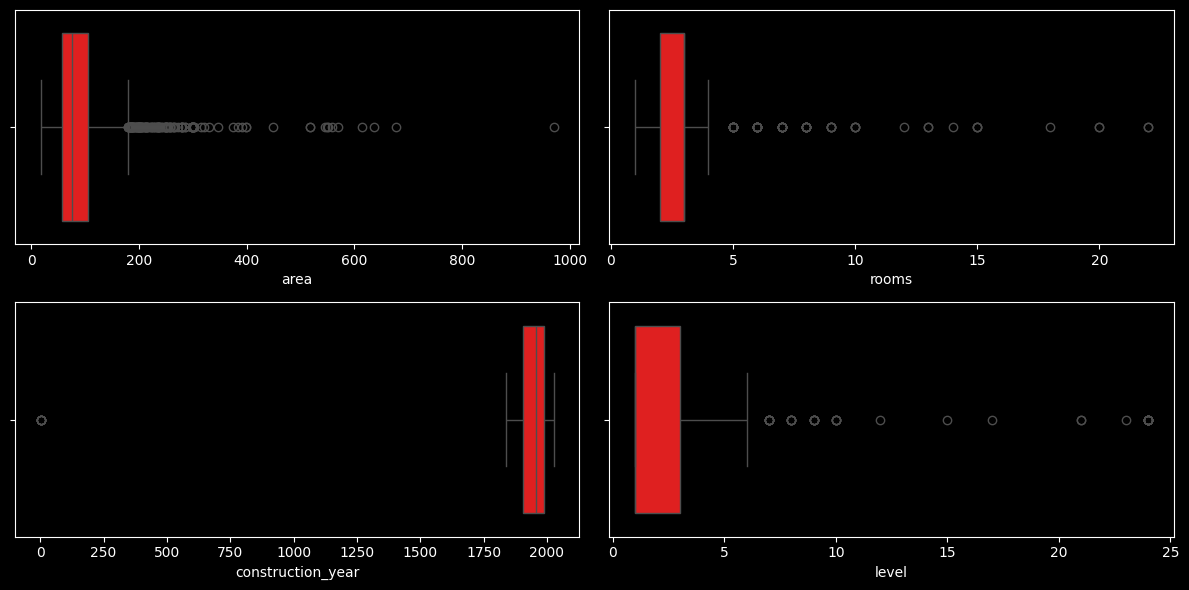

In [ ]:
# создаем список из столбцов которые нас интересуют
outlier_cols = ['area', 'rooms', 'construction_year', 'level']

# пройдемся циклом по этому списку
fig, axs = plt.subplots(2, 2, figsize = (12, 6))
axs = axs.ravel()

for i, col in enumerate(outlier_cols):
    sns.boxplot(x=df[col], color='red', ax = axs[i])

plt.tight_layout()

В данном случае метод Z-оценки и IQR(межквартальный диапазон) не будем использовать. Достаточно визуального метода. Не все выбросы удалили так как они могут нести ценную информацию, будем осторожны.

Мы увидили что есть выбрасы столбцах. Для обеспечения достоверности результатов мы выполним точечную очистку, исключив следующие категории:

1. Квартиры с нетипичными характеристиками:
- Количество комнат: более 7
- Этажность: более 6
- Площадь: более 250 м²

2. Неактуальные данные:
- Год постройки: 1 (неверный)
- Год постройки: 2025 и 2026 (квартиры в стадии строительства)

3. Редкие квартиры с типом энергии:
- Открытый пол с подогревом
- Пеллеты
- Экономный дом
- Дерево
- Сжиженный газ
- Геотермальная энергия

4. Редкие квартиры с системой отопления:
- Уголь
- Тепловой насос открытый
- Подогрев пола открытый
- Теплый пол открытый
- Духовка
- Сертификат "Минергия"
- Сборный дом
- Воздух
- Тип отопления открытый

В данном случае метод Z-оценки и IQR(межквартальный диапазон) не будем использовать. Достаточно визуального метода. Не все выбросы удалили так как они могут нести ценную информацию, будем осторожны.

In [ ]:
df.drop(df[df['rooms'] > 7].index, inplace=True)

In [ ]:
df.drop(df[df['level'] > 6].index, inplace=True)

In [ ]:
df.drop(df[df['area'] > 250].index, inplace=True)

In [ ]:
indexes_to_drop = df[df['construction_year'].isin([1, 2025, 2026])].index
df = df.drop(indexes_to_drop)

In [ ]:
energy_drop = df[df['energy'].isin(['Fußbodenheizungoffener ', 'Pellets',
                                               'Niedrigenergiehaus', 'Holz', 'Flüssiggas', 'Erdwärme'])].index
df = df.drop(energy_drop )

In [ ]:
energy_drop = df[df['heating'].isin(['Kohle', 'Wärmepumpeoffener ', 'Etagenheizungoffener ',
                                     'Fußbodenheizungoffener ','Ofen', 'Minergie zertifiziert',
                                     'Fertighaus', 'Luft', 'Heizungsartoffener ' ])].index
df = df.drop(energy_drop )

In [ ]:
df.describe()

,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
count,2.617000e+03,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000
mean,5.379673e+05,84.182186,2.768055,3.678514,11872.531525,1948.217807,2.019488,6088.690784
std,4.188888e+05,38.747245,1.098757,1.779543,1840.762096,44.476765,1.320852,2305.338160
min,9.800000e+04,17.410000,1.000000,1.600000,1099.000000,1838.000000,1.000000,997.581620
25%,2.750000e+05,57.650000,2.000000,3.570000,10559.000000,1907.000000,1.000000,4486.098655
50%,3.990000e+05,75.000000,3.000000,3.570000,12109.000000,1956.000000,1.000000,5600.000000
75%,6.790000e+05,104.000000,3.000000,3.570000,13088.000000,1984.000000,3.000000,7362.518090
max,3.800000e+06,250.000000,7.000000,48.100000,77933.000000,2024.000000,6.000000,20137.207425


## 3.Добавление дополнительных признаков

### 3.1 Цена за квартиру в миллионах

In [ ]:
# добавим данные за квартиру, в млн. евро
df['mil_price'] = round(df['price'] / 1000000, 2)

### 3.2 Тип энергии в квартирах

In [ ]:
# создаем новый столбец energy_number тип энергии и пронумеруем
energy_mapping = {
    'Gas': 1,
    'Fernwärme': 2,
    'Öl': 3,
    'Elektro': 4,
    'Luft': 5,
    'Fußbodenheizung': 6,
    'Blockheizkraftwerk': 7,
    'Solar': 8
}
df['energy_number'] = df['energy'].map(energy_mapping)

### 3.3 Система отопления в квартирах

In [ ]:
# создаем новый столбец heating_number тип отопления
heating_mapping = {
    'Zentralheizung': 1,
    'Etagenheizung': 2,
    'Fußbodenheizung': 3,
    'Heizungsart': 4,
    'Kamin': 5,
    'Wärmepumpe': 6,
    'Wasser': 7,
    'Kf': 8,
    'Niedrigenergiehaus': 9,
}
df['heating_number'] = df['heating'].map(heating_mapping)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
# проверим слайсингом наши колонки
df.iloc[0:7,-3:]

,mil_price,energy_number,heating_number
0,0.25,3,1
1,0.77,1,2
2,0.35,1,1
3,0.49,1,2
4,0.56,2,3
5,0.18,3,1
6,0.40,1,1


In [ ]:
df.isna().sum()

url                  0
energy               0
heating              0
price                0
area                 0
rooms                0
fee                  0
zipcode              0
construction_year    0
level                0
price_per_area       0
mil_price            0
energy_number        0
heating_number       0
dtype: int64

## 4.Исследовательский анализ данных

### 4.1 Анализ параметров объектов недвижимости

#### 4.1.1 Жилая площадь

В Германии в рекламных объявлениях недвижимости, обычно указывается размер **жилой** площади (Wohnfläche) в м².

In [ ]:
# функция для расчета среднего, медианы, мин и макс
def mm(df, column):
    try:
        display('Среднее значение для столбца: ' + column, round(df[column].mean(), 2))
        display('Медианное значение для столбца: ' + column, round(df[column].median(),2))
        display('Минимальное значение для столбца: ' + column, round(df[column].min(),2))
        display('Максимальное значение для столбца: ' + column, round(df[column].max(),2))
    except:
        return 'Проверьте параметры'

In [ ]:
mm(df, 'area')

'Среднее значение для столбца: area'

84.18

'Медианное значение для столбца: area'

75.0

'Минимальное значение для столбца: area'

17.41

'Максимальное значение для столбца: area'

250.0

Диапазон жилой площади составляет от 17.41 до 250 м².

<Figure size 1200x600 with 0 Axes>

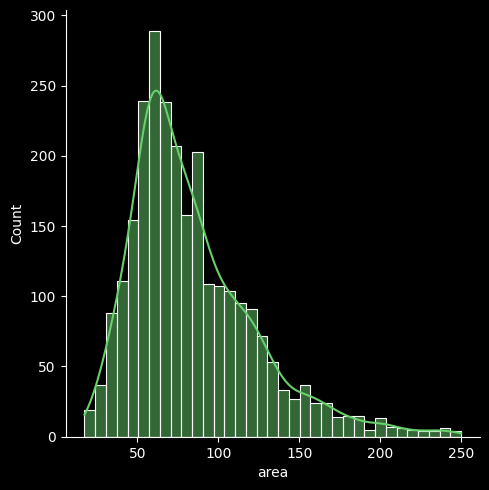

In [ ]:
# построим график распределения и оценим плотность ядра
plt.figure(figsize=(12,6))
sns.displot(df.area, kde=True, color = '#67cf6c')

Что касается асимметрии, наблюдается правостороннее (положительное) смещение в распределении данных.
В диапазоне от 30 до 150 находятся основные выделяющиеся значения жилой площади, при этом в диапазоне от 30 до 100 м², находится наибольшее количество квартир.


Категоризации площади:

- Маленькая: 0 - 20%
- Меньше средней: 21 - 40%
- Средняя: 41 - 60%
- Большая: 61 - 80%
- Экстремально большая: 81 - 100%

In [ ]:
# распределим диапазон значений с помощью метода .quantile() с шагом 20%
df['area'].quantile([.20, .40, .60, .80])

0.2     54.602
0.4     66.734
0.6     84.960
0.8    112.000
Name: area, dtype: float64

Итого:

- маленькая площадь: от 0 до 54.6 м²
- меньше средней: от 54.6 до 66.734 м²
- средняя: от 66.734 до 84.96 м²
- большая: от 84.96 до 112.00 м²
- экстремально большая: от 112.00 м² и выше

Добавим столбец `area_category` на основании диапазонов, которые мы получили

In [ ]:
bins = [0, 54.6, 66.734, 84.96, 112.00, float('inf')]
labels = ['маленькая', 'меньше средней', 'средняя', 'большая', 'экстремально большая']
df['area_category'] = pd.cut(df['area'], bins = bins, labels = labels)

In [ ]:
df['area_category'] = pd.cut(df['area'],
                      bins=[0, 54.6, 66.734, 84.96, 112.00, float('inf')],
                      labels=['маленькая', 'меньше средней', 'средняя', 'большая', 'экстремально большая'])

In [ ]:
# 5 максимальных значений, используем метод nglargest
max_mil_price = df.nlargest(5, 'area')
max_mil_price['area']

463     250.0
494     250.0
1028    249.0
1124    249.0
981     243.0
Name: area, dtype: float64

In [ ]:
# 5 минимальныx значений, спользуем метод nsmallest
min_mil_price = df.nsmallest(5, 'area')
min_mil_price['area']

922    17.41
923    17.41
924    17.50
925    17.50
921    19.00
Name: area, dtype: float64

In [ ]:
'''функция для сортировки и определения процентного соотношения указанных категорий в данных
# сategory_x(датафрейм, индекс по которому обращаемся к сводной таблице, столбец в котором
определяем процент данных по категории)'''

def category_x(df, index, column):
    try:
        # Группируем данные по индексу и подсчитываем количество значений в столбце
        pivot_table = df.pivot_table(index=index, values=column, aggfunc='count')

        # Вычисляем процент от общего количества
        total_count = pivot_table.sum()
        pivot_table['Процент от общего'] = (pivot_table[column] / pivot_table[column].sum()) * 100

        # Переименовываем столбец с количеством и сортируем
        pivot_table = pivot_table.rename(columns={column: 'Количество в ' + column}).\
                      sort_values(by='Количество в ' + column, ascending=False)

        return pivot_table
    except Exception as e:
        return f'Проверьте параметры: {e}'

In [ ]:
# определим процентное отношение категорий в общих данных
category_x(df, 'area_category', 'area')

,Количество в area,Процент от общего
area_category,,
большая,525,20.061139
маленькая,524,20.022927
меньше средней,523,19.984715
средняя,523,19.984715
экстремально большая,522,19.946504


Доля квартир каждого типа жилой площади почти одинакова.

Text(0.5, 1.0, 'Размер квартир к числу комнат')

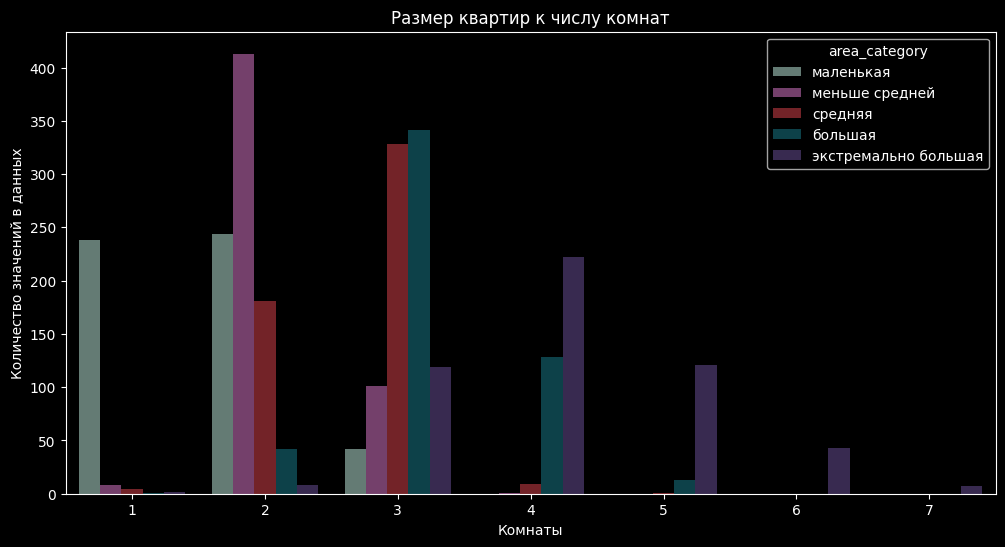

In [ ]:
# Построим график чтоб понять размер квартир к числу комнат

# Устанавливаем размер фигуры
plt.figure(figsize=(12, 6))

# Создаем цветовую палитру
custom_palette_r = {'маленькая': '#a2d5c6', 'средняя': '#d72631', 'большая': '#077b8a',
                                            'экстремально большая': '#5c3c92', 'меньше средней': '#d15ebc'}

# Группируем данные и считаем количество значений
grouped_ar = df.groupby(['area_category', 'rooms']).size().reset_index(name = 'counts')

# Создаем столбчатую диаграмму
sns.barplot(x = 'rooms', y = 'counts', hue = 'area_category', data = grouped_ar, palette=custom_palette_r, alpha = 0.6)

# Настройка графика
plt.ylabel('Количество значений в данных')
plt.xlabel('Комнаты')
plt.title('Размер квартир к числу комнат')

На основании графика можно сделать вывод

1. Распределение площади по количеству комнат:

- Однокомнатные квартиры: преобладает маленькая площадь.
- Двухкомнатные квартиры: преобладает площадь меньше средней.
- Трехкомнатные квартиры: преобладают площади большая и средняя.
- Четырехкомнатные и более: преобладают экстремально большие площади.

2. Наблюдения:

- С увеличением количества комнат наблюдается тенденция к увеличению площади.
- В однокомнатных и двухкомнатных квартирах площадь, как правило, меньше, чем в трехкомнатных и более.
- В четырехкомнатных и более квартирах преобладают экстремально большие площади.

#### 4.1.2 Количество комнат

In [ ]:
mm(df, 'rooms')

'Среднее значение для столбца: rooms'

2.77

'Медианное значение для столбца: rooms'

3.0

'Минимальное значение для столбца: rooms'

1

'Максимальное значение для столбца: rooms'

7

Диапазон количества комнат в изучаемой выборке у нас составляет от 1 до 7.

<Axes: >

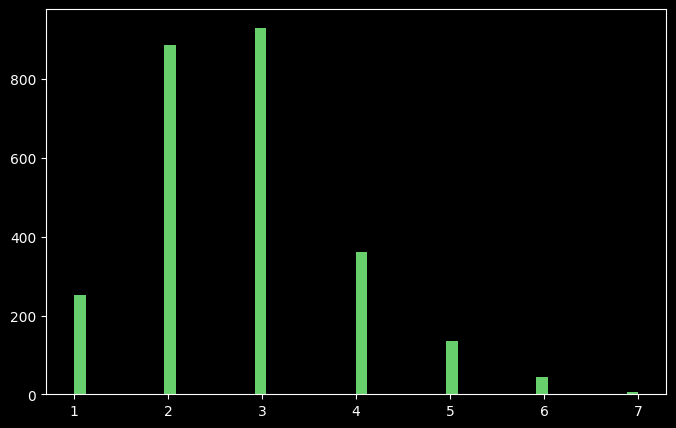

In [ ]:
# построим график с комнатми
plt.figure(figsize=(8,5))
df['rooms'].hist(bins=50, grid = False, color='#67cf6c')

Преобладают двух и трехкомнатные квартиры.

In [ ]:
# для точного подсчета воспользуемся value_counts()
df['rooms'].value_counts()

3    931
2    888
4    360
1    253
5    135
6     43
7      7
Name: rooms, dtype: int64

Количество семикомнатных квартир всего 7, оставим их и не будем удалять.

#### 4.1.3 Параметр цены

In [ ]:
# посчитаем значения mean, median, min, max
mm(df, 'mil_price')

'Среднее значение для столбца: mil_price'

0.54

'Медианное значение для столбца: mil_price'

0.4

'Минимальное значение для столбца: mil_price'

0.1

'Максимальное значение для столбца: mil_price'

3.8

<Figure size 800x500 with 0 Axes>

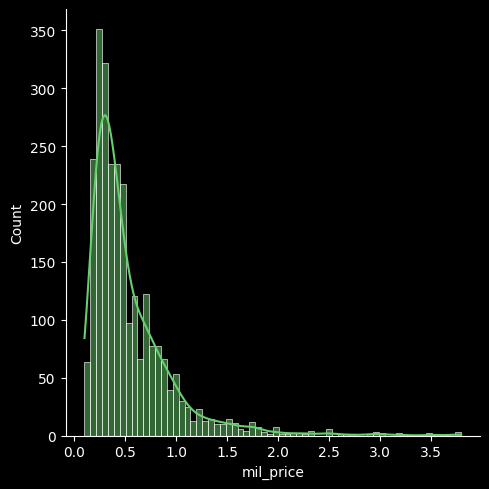

In [ ]:
# построим график с ценами
plt.figure(figsize=(8,5))
sns.displot(df.mil_price, kde=True, color ='#67cf6c')

По графику видим, что основные цены находятся в пределах 1 млн.евро.

Распределение максимальных цен по квартирам в зависимости от количества комнат.

Text(0.5, 1.0, 'Максимальная цена')

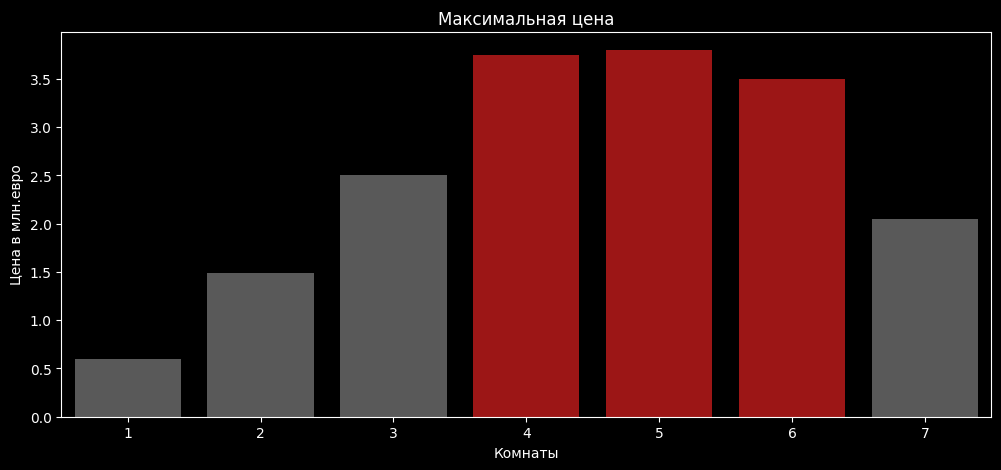

In [ ]:
# Устанавливаем размер фигуры
plt.figure(figsize=(12, 5))

# Группируем данные по 'rooms'
df_price_rooms = df.pivot_table(index = 'rooms', values = 'mil_price', aggfunc = 'max')

# Создаем цветовую палитру
cols = ['grey' if x < 3 else 'red' for x in df_price_rooms['mil_price']]

# Строим barplot
sns.barplot(x = 'rooms', y = 'mil_price', data = df_price_rooms, palette = cols, alpha = 0.7)

# Настройка графика
plt.ylabel('Цена в млн.евро')
plt.xlabel('Комнаты')
plt.title('Максимальная цена')

Ценообразование на недвижимость в Берлине, как и в любом другом мегаполисе, неоднородно. Для более точной оценки и сравнения квартир выполним их категоризация по цене.

Категории:

1. Эконом-класс:

- Доступные цены.
- Небольшая площадь.
- Базовые удобства.

2. Комфорт класс:

- Сбалансированная цена.
- Комфортные условия проживания.
- Разнообразие планировок и площадей.
- Подходит для семей, пар, людей, ценящих практичность и комфорт класс.

3. Бизнес-класс:

- Просторные и современные квартиры.
- Высокий уровень комфорта.
- Престижные районы.
- Подходит для состоятельных людей, ценящих статус и эксклюзивность.

4. Элитный класс:

- Редкие и уникальные предложения.
- Особая ценность: архитектурный дизайн, площадь, расположение.
- Ограниченное количество на рынке.
- Высокая стоимость.
- Подходит для ценителей роскоши, инвестиций, коллекционеров.

Для категоризации поделим цены:

- эконом класс: от 0 до 0,20 млн.
- комфорт класс: от 0,21 до 0,55 млн.
- бизнес класс: от 0,56 до 2,5 млн.
- элитный класс: от 2,6 до 3,8 млн.

In [ ]:
# Разобьем цены на картиры на категории с помощью функции
def categorize_price(Kategorie):
    if 0 <= Kategorie <= 0.20:
        return 'эконом класс'

    elif 0.21 <= Kategorie <= 0.55:
        return 'комфорт класс'

    elif 0.56 <= Kategorie <= 2.5:
        return 'бизнес класс'

    elif 2.6 <= Kategorie < 5:
        return 'элитный класс'
    else:
        return 'не определено'

df['price_category'] = df['mil_price'].apply(categorize_price)

In [ ]:
# проверяем колонку
df['price_category'].value_counts()

комфорт класс    1499
бизнес класс      849
эконом класс      253
элитный класс      16
Name: price_category, dtype: int64

In [ ]:
max_mil_price = df.nlargest(5, 'mil_price')
max_mil_price['mil_price']

1028    3.80
1120    3.75
1734    3.75
765     3.50
2035    3.50
Name: mil_price, dtype: float64

In [ ]:
min_mil_price = df.nsmallest(5, 'mil_price')
min_mil_price['mil_price']

555    0.1
921    0.1
922    0.1
923    0.1
924    0.1
Name: mil_price, dtype: float64

Видно что есть разница по ценам. Медианной значение у нас 0,4 млн.

In [ ]:
category_x(df, 'price_category', 'mil_price')

,Количество в mil_price,Процент от общего
price_category,,
комфорт класс,1499,57.279327
бизнес класс,849,32.441727
эконом класс,253,9.667558
элитный класс,16,0.611387


Из данных видно, что преобладают квартиры комфорт класса. На втором месте бизнес класса.


Теперь посмотрим на соотношение цены квартир к количеству комнат.

Text(0.5, 0, 'Комнаты')

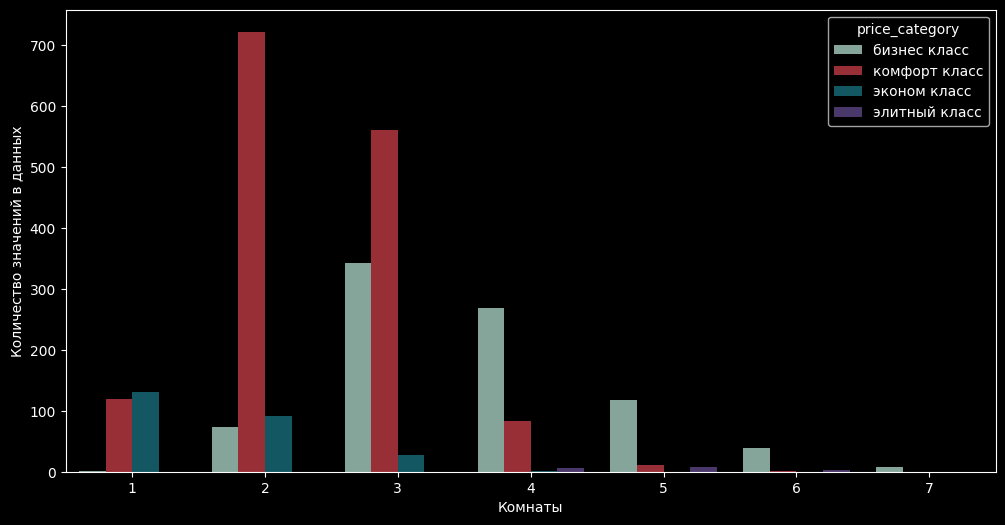

In [ ]:
# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

# Группируем данные и считаем количество значений
grouped_cat = df.groupby(['price_category', 'rooms']).size().reset_index(name = 'counts')

# Создаем цветовую палитру
custom_palette = {'бизнес класс': '#a2d5c6', 'комфорт класс': '#d72631',
                  'эконом класс': '#077b8a', 'элитный класс': '#5c3c92'}

# Создаем столбчатую диаграмму
sns.barplot(x = 'rooms', y = 'counts', hue = 'price_category',
            data = grouped_cat, palette = custom_palette, alpha = 0.8)

# Настройка графика
plt.ylabel('Количество значений в данных')
plt.xlabel('Комнаты')

По графику видно в однокомнатных квартирах преобладают квартиры эконом класса, до 0.20 млн.

В 2, 3 - комнатных квартирах преобладают квартиры комфорт класса от 0,21 до 0,55 млн.

Начиная с четырехкомнатной и далее преобладают квартиры бизнес-класса от 0,56 до 2,5 млн.

#### 4.1.4 Параметр тип энергии

Построим график распределения максимальных цен по квартирам в зависимости от типа энергии.

Text(0.5, 1.0, 'Распределение максимальных цен по квартирам в зависимости от типа энергии')

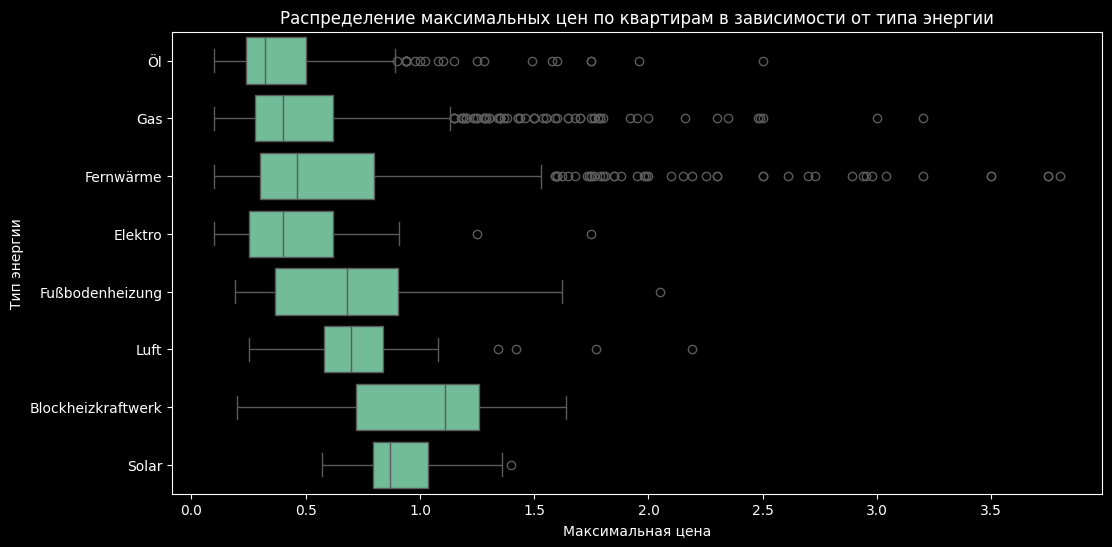

In [ ]:
# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

# Строим boxplot с помощью seaborn
sns.boxplot(x ='mil_price', y = 'energy', data = df, color = '#65c999')

# Настройка графика
plt.ylabel('Тип энергии')
plt.xlabel('Максимальная цена')
plt.title('Распределение максимальных цен по квартирам в зависимости от типа энергии')

Далее определим процентное отношение типов энергии в общих данных.

In [ ]:
category_x(df, 'energy', 'mil_price')

,Количество в mil_price,Процент от общего
energy,,
Gas,1369,52.311807
Fernwärme,726,27.741689
Öl,403,15.399312
Elektro,37,1.413833
Luft,33,1.260986
Fußbodenheizung,24,0.917081
Blockheizkraftwerk,13,0.496752
Solar,12,0.458540


Больше всех квартиры типом энергии `Gas`.

Второе место занимает `Fermwärme` – отопление через котельную, централизованное теплоснабжение.

Третье "Мазут" или "Масло" полное название `Ölheizung`.

#### 4.1.5 Параметр система отопления

Text(0.5, 1.0, 'Распределение максимальных цен по квартирам в зависимости от системы отопления')

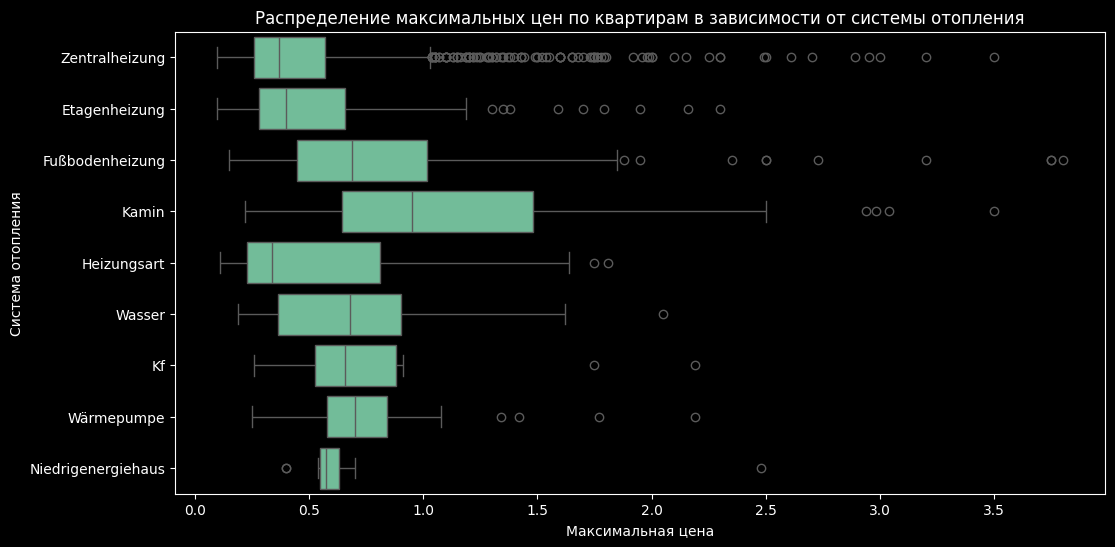

In [ ]:
# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

sns.boxplot(x ='mil_price', y = 'heating', data = df, color = '#65c999')

# Настройка графика
plt.ylabel('Система отопления')
plt.xlabel('Максимальная цена')
plt.title('Распределение максимальных цен по квартирам в зависимости от системы отопления')

In [ ]:
category_x(df, 'heating', 'mil_price')

,Количество в mil_price,Процент от общего
heating,,
Zentralheizung,1769,67.596485
Etagenheizung,362,13.832633
Fußbodenheizung,299,11.425296
Heizungsart,63,2.407337
Kamin,43,1.643103
Wärmepumpe,33,1.260986
Wasser,24,0.917081
Kf,12,0.458540
Niedrigenergiehaus,12,0.458540


Больше всех квартиры с системой отопления `Zentralheizung` – нагревательная установка, обычно устанавливаемая в подвале и обогревающая все комнаты или квартиры в здании. Самый распространенный вид отопления.

Второе место занимает `Etagenheizung` – этажное отопление, обычно используется для обогрева отдельного этажа или жилого блока.  

На третьем месте `Fußbodenheizung` – теплый пол, работает в области низких температур. Теплый пол может быть комбинирован с другим системами отопления и может работать с различными источниками энергии, такими как тепловые насосы, солнечные панели, газовые , масляные, деревянные и пеллетные котлы.

#### 4.1.4 Итого


После изучения данных были удалены крайне необычные выбросы в разных столбцах.  Пустые значения в столбцах `тип энергии` и `система отопления` были удалены.

**Результаты анализа**

Представлены следующие параметры квартир:

- Жилая площадь: от 17,41 м² до 250 м².
- Количество комнат: от 1 до 6.
- Этаж: от 1 до 7.
- Год постройки дома: с 1838 по 2024 год.


### 4.2 Анализ факторов, влияющих на общую стоимость квартиры

Для дальнейшего исследования отфильтруем данные, так как по этим параметрам буду отвечать на поставленные вопросы. В фильтр для создания нового датафрейма включу следующие данные:
- energy — тип энергии в квартире.
- energy_number — числовые значения тип энергии.
- heating — система отопления.
- heating_number — числовые значения система отопления.
- area — площадь квартиры в квадратных метрах м².
- rooms — число комнат.
- level - этаж
- construction_year — год постройки дома.
- mil_price — цена в млн. евро.

In [ ]:
df_filter = df[['energy', 'energy_number', 'heating', 'heating_number', 'area',
                'rooms', 'level', 'construction_year', 'mil_price']].copy(deep=True)

<Axes: >

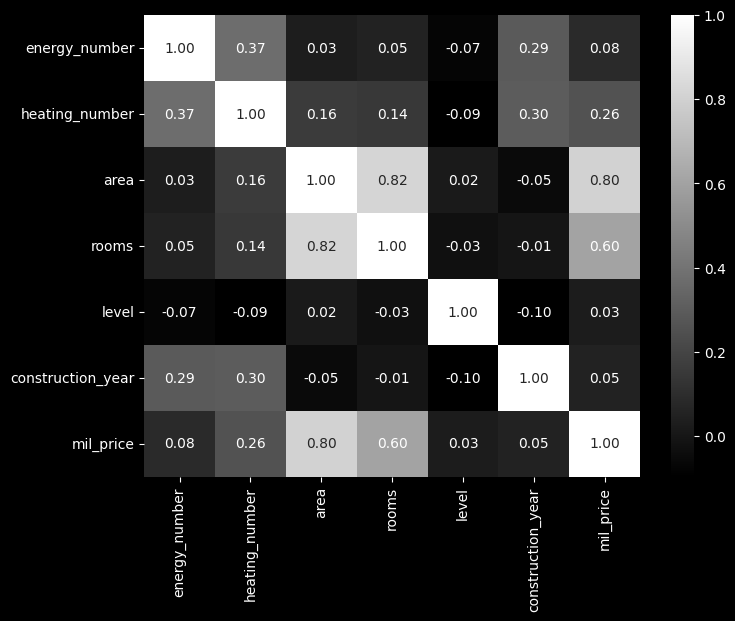

In [ ]:
# посмотрим визуализацию этих колонок через heatmap
correlation_matrix = df_filter.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='gray', annot = True, fmt = ".2f")

#### 4.2.1 Жилая площадь

Воспользуемся точечной диаграммой, чтобы понять как распределены цены на
квартиры в зависимости от площади.

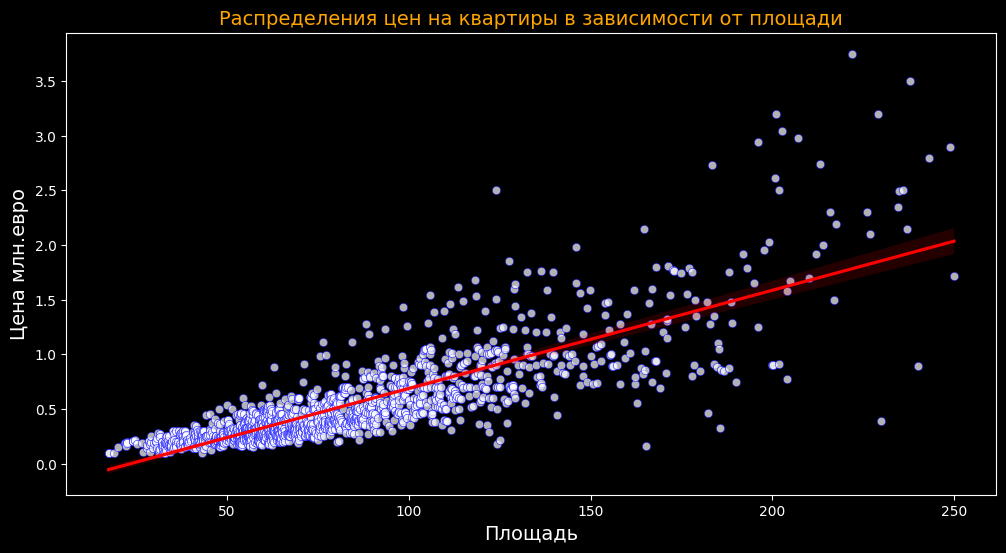

In [ ]:
# Группируем данные по 'area' и вычисляем медианную цену 'mil_price'
price_m_area = df_filter.groupby('area')['mil_price'].agg('median').reset_index()

# Устанавливаем размер фигуры
plt.figure(figsize=(12, 6))

# Настройки цвета точек на графике
scatter_kws = {
    'color': 'white',
    'edgecolors': 'blue',
    'linewidths': 0.5,
    'alpha': 0.7
}

# Строим линейную регрессию с помощью seaborn и добавляем дополнительные диаграммы рассеяния
sns.regplot(x = 'area', y = 'mil_price', data = price_m_area, scatter_kws = scatter_kws, line_kws = {'color': 'red'})

# Настройка графика
plt.xlabel('Площадь', fontsize = 14)
plt.ylabel('Цена млн.евро', fontsize = 14)
plt.title('Распределения цен на квартиры в зависимости от площади',  fontsize = 14, color = 'orange')
plt.grid(False)

Проверим корреляцию с помощью метода corr()

In [ ]:
df_filter['mil_price'].corr(df_filter['area']).round(2)

0.8

Мы видим по графику и по расчету корреляции, что есть сильно (**высокая**) положительная зависимость между жилой площадью квартиры и ценой. Тоже самое что и на тепловой карте.

#### 4.2.2 Количество комнат

Воспользуемся точечной диаграммой, чтобы понять как распределены цены на квартиры в зависимости от количество комнат.

Добавим линию регрессии

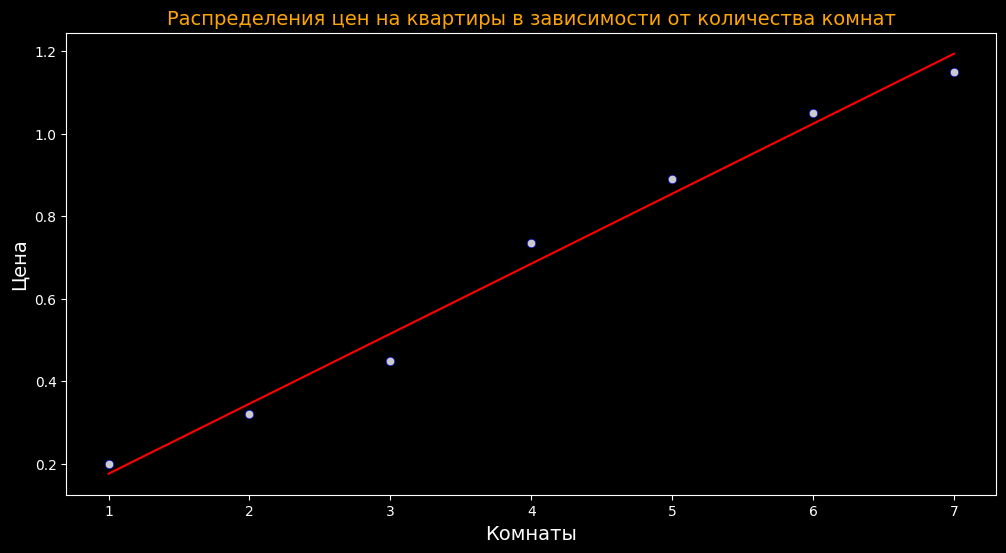

In [ ]:
# Группируем данные по 'rooms' и вычисляем медианную цену 'mil_price'
price_m_rooms = df_filter.groupby('rooms')['mil_price'].agg('median').reset_index()

# Устанавливаем размер фигуры
plt.figure(figsize=(12, 6))

# Строим диаграмму рассеяния с линией тренда для цены квартиры от количества комнат
sns.scatterplot(data = price_m_rooms, x = 'rooms', y = 'mil_price', color = 'white',
                                  edgecolors = 'blue', linewidths = 0.5, alpha = 0.8)

# Добавляем линию регресии
red_price_m_rooms = np.polyfit(price_m_rooms['rooms'], price_m_rooms['mil_price'], 1)
poly1d_fn = np.poly1d(red_price_m_rooms)
plt.plot(price_m_rooms['rooms'], poly1d_fn(price_m_rooms['rooms']), color = 'red')

# Настройка графика
plt.xlabel('Комнаты', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.title('Распределения цен на квартиры в зависимости от количества комнат', fontsize = 14, color = 'orange')
plt.grid(False)

Проверим корреляцию с помощью метода corr()

In [ ]:
df_filter['mil_price'].corr(df_filter['rooms']).round(2)

0.6

Делаем выводы по графику и по расчету корреляции, что есть средняя (**заметная**) положительная зависимость  между количетсвом комнат и ценой.

#### 4.2.3 Тип энергии в квартирах

Построим диаграмму отношения цены к типу энергии.

Text(0.5, 1.0, 'Диаграмма отношений цены к типу энергии')

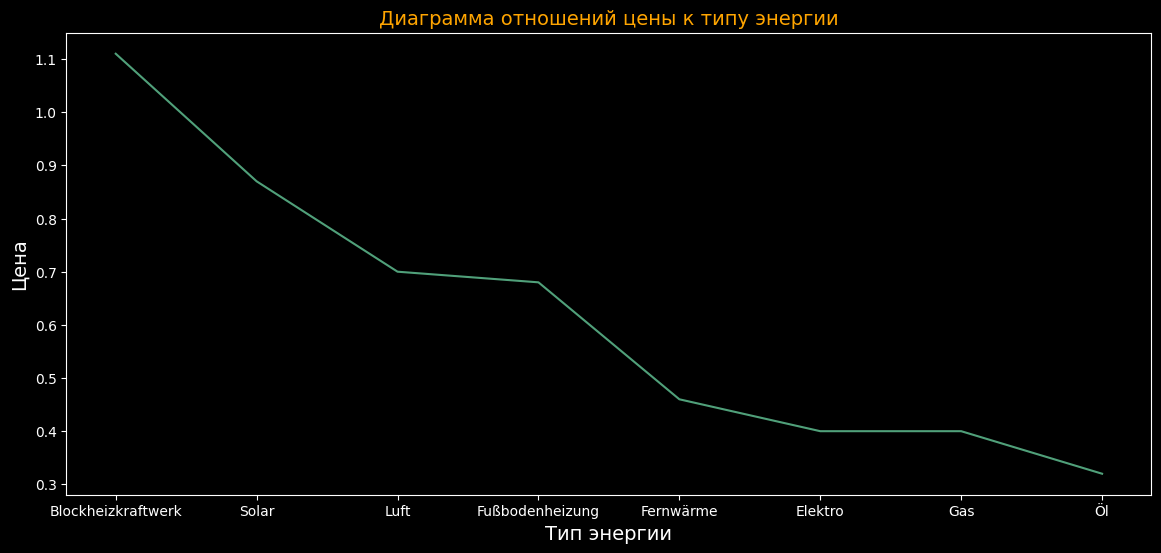

In [ ]:
# Группируем данные по 'energy' и вычисляем медианную цену 'mil_price'
# Строим диаграмму отношений
df_filter.pivot_table(index = 'energy', values = 'mil_price', aggfunc = 'median')\
.sort_values(by = 'mil_price', ascending=False)\
.plot(y = 'mil_price', kind = 'line', figsize=(14, 6), legend=False, grid=False, color='#65c999', alpha=0.8)

# Настройка графика
plt.ylabel('Цена', fontsize = 14)
plt.xlabel('Тип энергии', fontsize = 14)
plt.title('Диаграмма отношений цены к типу энергии', fontsize = 14, color = 'orange')

1. По графику видно, что цены на квартиры c типом энергии  `Blockheizkraftwerk`(BHKW) - это система отопления, которая объединяет в себе тепло и электрогенерацию, на первом месте.

2. На втором месте `Solar` - солнечная энергия.

3. Третье место `Luft` - воздушная система.

Проверим корреляцию с помощью метода corr()

In [ ]:
df_filter['mil_price'].corr(df_filter['energy_number']).round(2)

0.08

Зависимость между типом энергии и ценой на квартиры, почти равна 0.

#### 4.2.4 Система отопления в квартирах

Построим диаграмму отношения цены к системе отопления.

Text(0.5, 1.0, 'Диаграмма отношений цены к системе отопления')

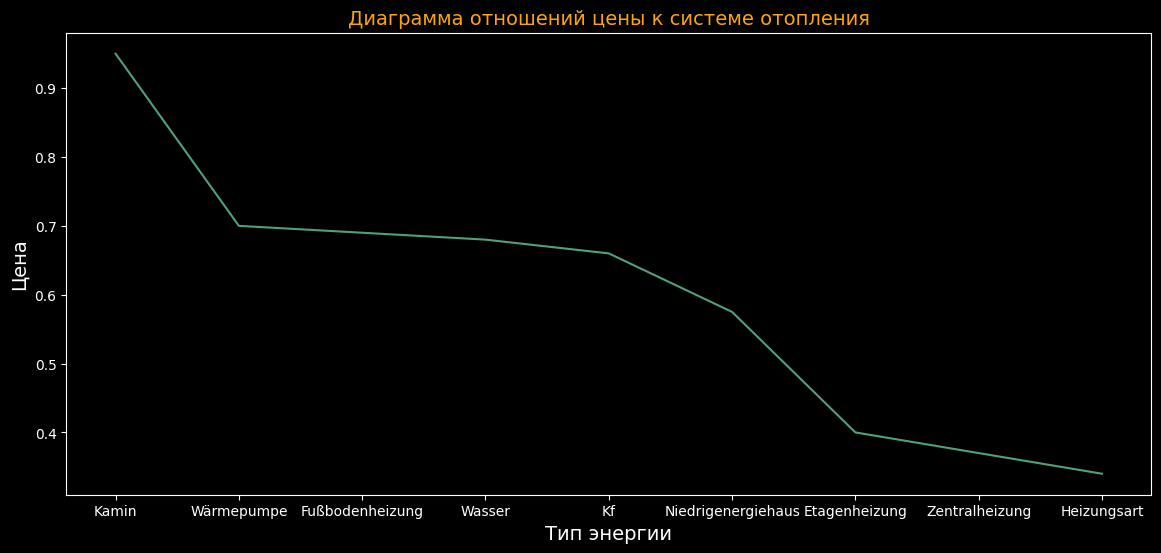

In [ ]:
# Группируем данные по 'heating' и вычисляем медианную цену 'mil_price'
# Строим диаграмму отношений
df_filter.pivot_table(index = 'heating', values = 'mil_price', aggfunc= 'median')\
.sort_values(by='mil_price', ascending=False)\
.plot(y='mil_price', kind='line', figsize=(14, 6), legend=False, grid=False, color='#65c999', alpha=0.8)

# Настройка графика
plt.ylabel('Цена', fontsize = 14)
plt.xlabel('Тип энергии', fontsize = 14)
plt.title('Диаграмма отношений цены к системе отопления', fontsize = 14, color = 'orange')

1. По графику видно, что цены с системой отопления  `Kamin` - на первом месте.

2. На втором месте `Wärmepumpe` - тепловой насос (тепловой двигатель).

3. Третье место `Fußbodenheizung` - теплый пол.

Проверим корреляцию с помощью метода corr()


In [ ]:
df_filter['mil_price'].corr(df_filter['heating_number']).round(2)

0.26

Делаем выводы по графику и по расчету корреляции, что есть слабая положительная зависимость между системой отоплением и ценой.

#### 4.2.5 Год постройки домов

In [ ]:
df_filter['construction_year'].sort_values().unique()

array([1838, 1848, 1858, 1864, 1870, 1871, 1872, 1874, 1876, 1877, 1880,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2007, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

Text(0.5, 1.0, 'График зависимости цены квартиры от года постройки')

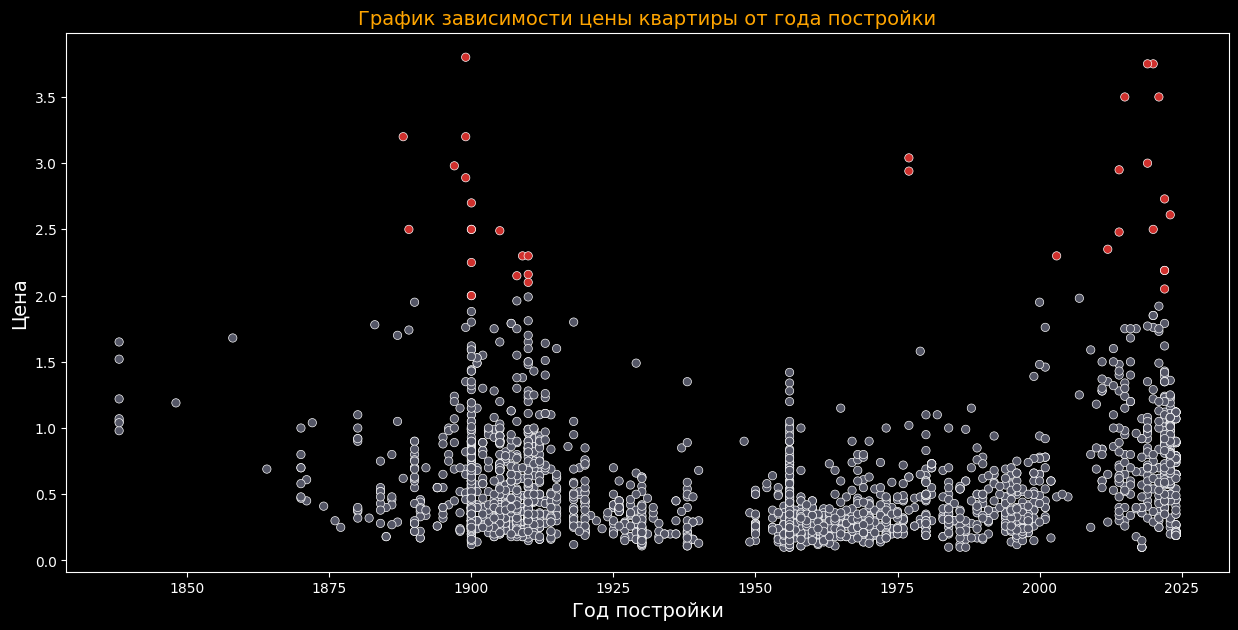

In [ ]:
# Устанавливаем размер фигуры
plt.figure(figsize=(15, 7))

# Настройка цветов
df_filter['color']= ['#545666' if x < 2.0 else '#cf302d' for x in df_filter['mil_price']]

# Построение графика scatterplot
sns.scatterplot(data=df_filter, x='construction_year', y='mil_price', hue='color',
                                    palette=['#545666', '#cf302d'], legend=False)

# Настройка графика
plt.xlabel('Год постройки', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.title('График зависимости цены квартиры от года постройки', fontsize = 14, color = 'orange')

Рассмотрим более детально год постройки квартир 1880-1920.

Text(0.5, 1.0, 'График зависимости цены квартиры от года постройки (1880-1920)')

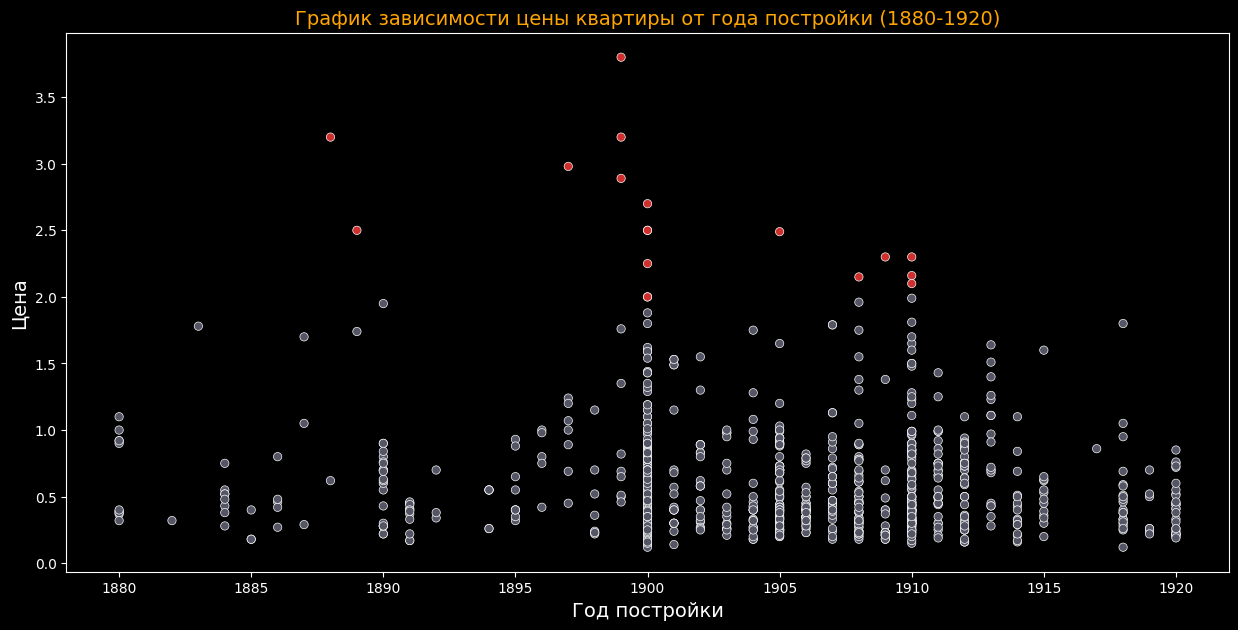

In [ ]:
# Устанавливаем размер фигуры
plt.figure(figsize=(15, 7))

# Фильтр 1880-1920
df_filter_subset = df_filter[(df_filter['construction_year'] >= 1880) & (df_filter['construction_year'] <= 1920)]

# # Создаем цветовую палитру
df_filter_subset['color'] = ['#545666' if x < 2.0 else '#cf302d' for x in df_filter_subset['mil_price']]

# Построение графика scatterplot для отфильтрованного периода
sns.scatterplot(data=df_filter_subset, x='construction_year', y='mil_price', hue='color',
                                            palette=['#545666', '#cf302d'], legend=False)

# Настройка графика
plt.xlabel('Год постройки', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.title('График зависимости цены квартиры от года постройки (1880-1920)', fontsize = 14, color = 'orange')

Можно сказать что квартиры периода постройки с 1880 по 1920 стоят дороже.

Период с 2000 по 2024 так же стоят дороже - эти квартиры относятся к новостройкам.

Проверим корреляцию с помощью метода corr()

In [ ]:
df_filter['mil_price'].corr(df_filter['construction_year']).round(2)

Зависимость между годом постройки и ценой на квартиры почти равна 0.

#### 4.2.6 Какие факторы влияют на стоимость квартиры.

<font size='5' > Итог: </font>

Анализ показал, что на ценообразование квартир в первую очередь влияют качественные характеристики, такие как площадь и количество комнат. Наиболее выраженная корреляция наблюдается между жилой площадью и ценой.

Однако не стоит недооценивать и другие параметры. В той или иной степени все они влияют на итоговую стоимость. Зависимость, хоть и менее выраженная, прослеживается между ценой и системой отопления, ценной и типом энергии ценой и годом постройки(новостройка или вторичка).

Иными словами, чем больше площадь квартиры, больше комнат, тем дороже она будет стоить.

Помимо перечисленных факторов, на ценообразование могут влиять и другие:

- Тип дома (новостройка или вторичка)
- Материал стен (кирпич, панельный, монолит)
- Этаж
- Система отопления
- Тип энергии
- Вид из окна
- Состояние квартиры (требует ремонта или готово к проживанию)
- Наличие ремонта
- Инфраструктура (наличие в непосредственной близости от объекта образовательных и медицинских учреждений, магазинов, кафе и ресторанов, зон отдыха и других объектов инфраструктуры увеличивает его привлекательность и, следовательно, стоимость.)
- Дополнительные удобства (паркинг, терраса, консьерж-сервис)

Отдельно можно выделить **Район**:

- Удаленность от центра города: Как правило, чем ближе объект недвижимости к центру, тем выше его стоимость. Это обуславливается близостью к ключевым объектам инфраструктуры, культурным центрам, зонам отдыха, а также повышенной транспортной доступностью.
- Транспортная доступность: Удобное транспортное сообщение с центром города и другими районами, наличие станций метро, остановок общественного транспорта, а также развитая сеть автомобильных дорог положительно влияет на ценность недвижимости.
- Социальная привлекательность: Расположение в престижном районе, с хорошей экологической обстановкой, низким уровнем преступности и благоприятной социальной средой увеличивает спрос на недвижимость и, как следствие, ее цену.

Зависимости стоимости от расстояния до центра:
- Центральные районы: В центре города, как правило, сосредоточены все блага цивилизации: театры, музеи, торговые центры, рестораны, офисы крупных компаний. Это делает центр привлекательным для людей, ведущих активный образ жизни, ценящих комфорт и доступность всех необходимых объектов инфраструктуры. Соответственно, цены на недвижимость в центре города традиционно самые высокие.
- Спальные районы: Чем дальше от центра, тем более тихая и спокойная атмосфера. Здесь преобладают жилые комплексы с развитой инфраструктурой, детские сады, школы, поликлиники. Стоимость недвижимости в спальных районах ниже, чем в центре, но она также может значительно отличаться в зависимости от конкретного района, его транспортной доступности, наличия объектов инфраструктуры и других факторов.

Таким образом, при оценке стоимости квартиры необходимо учитывать комплекс факторов, чтобы получить максимально точный результат.

## 5.Вывод на основании проведенного анализа

**Подготовка данных**

Первый этап проекта был посвящен тщательной очистке данных. Это позволило устранить ошибки, выбросы и пропуски, делая информацию более точной и релевантной.
Стандартизация данных унифицировала различные варианты записи, уменьшив количество ошибок.
В данном проекте были отфильтрованы и преобразованы параметры комнат, жилой площади, этаж, год постройки.

Добавление новых столбцов:
- цена в миллионах
- нумерация типа энергии в квартирах
- нумерация системы отопления в квартирах

Что расширило возможности анализа.

**Характеристики исследуемых объектов**

Обработка данных позволила сделать следующие выводы о недвижимости:

- Жилая площадь: от 17,41 м² до 250 м².
- Количество комнат: от 1 до 6.
- Этаж: от 1 до 7.
- Год постройки дома: с 1838 по 2024 год.

**Факторы, влияющие на цену**

Анализ показал, что наиболее значимыми факторами, влияющими на цену квартиры, являются:

- Жилая площадь
- Количество комнат

Менее значимыми или незначительными факторами оказались:

- Тип энергии
- Система отопления
- Год постройки
- Этаж

Несмотря на это немецкая столица держит курс на зеленую энергию: начиная с 2023 года все новостройки Берлина должны будут оборудованы солнечными установками на крыше.
Согласно анализу по нашим данным, в 92% объектах построенных в 2023 году данное оборудование установлено. Цель властей – сделать город климатически нейтральным.

Сегодня благодаря солнечной энергетике город покрывает только 0,7% своих потребностей. Принятый закон в 2021 году – часть более глобального проекта по переходу Берлина на зеленую энергетику под названием **Masterplan Solarity**.